# AI 05

> 학번: 2017132006
>
> 이름: 공상민

---

In [5]:
import numpy as np
import matplotlib.pyplot as plt

### 단순한 계층 구현
___

In [6]:
# 5.1 MultLayer

class MultLayer:
    def __init__(self):
        self.x = None
        self.y = None

    def forward(self, x, y):
        self.x = x
        self.y = y

        return x * y

    def backward(self, dout):
        dx = dout * self.y
        dy = dout * self.x

        return dx, dy


In [9]:
# 5.2

apple = 100
apple_num = 2
tax = 1.1

layer1 = MultLayer()
layer2 = MultLayer()

out1 = layer1.forward(apple, apple_num)
out2 = layer2.forward(out1, tax) 

print('price = ', out2)

price =  220.00000000000003


In [10]:
# 5.3
dout2 = 1
dout1, dtax = layer2.backward( dout2 )
dapple, dapple_num = layer1.backward( dout1 )


print('dout1 =', dout1)
print('dtax =', dtax)
print('dapple =', dapple)
print('dapple_num =', dapple_num)

dout1 = 1.1
dtax = 200
dapple = 2.2
dapple_num = 110.00000000000001


In [11]:
# 5.4 AddLayer

class AddLayer:
    
    def forward(self, x, y):
        return x + y
    
    def backward(self, dout):
        return dout, dout

In [13]:
# 5.5

apple = 100
apple_num = 2
orange = 150
orange_num = 3
tax = 1.1

layer1 = MultLayer()
layer2 = MultLayer()
layer3 = AddLayer()
layer4 = MultLayer()

# forward
sum_apple = layer1.forward(apple, apple_num)
sum_orange = layer2.forward(orange, orange_num)
sum_all = layer3.forward(sum_apple, sum_orange)
price = layer4.forward(sum_all, tax)
# backward
dprice = 1
dsum_all, dtax = layer4.backward(dprice)
dsum_apple, dsum_orange = layer3.backward(dsum_all)
dorange, dorange_num = layer2.backward(dsum_orange)
dapple, dapple_num = layer1.backward(dsum_apple)
print('price = {:.2f}'.format(price))
print('dapple = {:.2f}, dapple_num = {:.2f}, \
dorange = {:.2f}, dorange_num = {:.2f}, \
dtax = {:.2f}'.format(dapple, dapple_num, dorange, dorange_num, dtax))

price = 715.00
dapple = 2.20, dapple_num = 110.00, dorange = 3.30, dorange_num = 165.00, dtax = 650.00


### 활성화 함수 계층
___

In [14]:
# 5.6 ReLU

class ReLU:
    def __init__(self):
        self.mask = None
    
    def forward(self, x):
        self.mask = (x <= 0)
        out = x.copy()
        out[self.mask] = 0

        return out
    
    def backward(self, dout):
        dout[self.mask] = 0
        dx = dout
        
        return dx

In [15]:
# 5.7
x = np.array([[1.0, -0.5], [-2.0, 3.0]])
print(x)

mask = (x <= 0)
print(mask)


[[ 1.  -0.5]
 [-2.   3. ]]
[[False  True]
 [ True False]]


In [16]:
# 5.8 Sigmoid

class Sigmoid:
    def __init__(self):
        self.out = None

    def forward(self, x):
        out = 1 / (1 + np.exp(-x))
        self.out = out

        return out
    
    def backward(self, dout):
        dx = dout * (1.0 - self.out) * self.out

        return dx

### Affine / Softmax 계층
___

In [18]:
# 5.9
X = np.random.rand(2)
W = np.random.rand(2, 3)
B = np.random.rand(3)

print( X.shape )
print( W.shape )
print( B.shape )

Y = np.dot(X, W) + B
print( Y )


(2,)
(2, 3)
(3,)
[1.10276727 0.64939534 0.29348767]


In [19]:
# 5.10
X_dot_W = np.array([[0, 0, 0], [10, 10, 10]])
B = np.array([1, 2, 3])

print( X_dot_W )
print( X_dot_W + B )

[[ 0  0  0]
 [10 10 10]]
[[ 1  2  3]
 [11 12 13]]


In [20]:
# 5.11
dY = np.array([[1, 2, 3], [4, 5, 6]])
print(dY)
dB = np.sum(dY, axis = 0)
print(dB)

[[1 2 3]
 [4 5 6]]
[5 7 9]


In [21]:
# 5.12 Affine

class Affine:
    def __init__(self, W, b):
        self.W = W
        self.b = b
        self.x = None
        self.dW = None
        self.db = None
    
    def forward(self, x):
        self.x = x
        out = np.dot(x, self.W) + self.b
        
        return out
    
    def backward(self, dout):
        dx = np.dot(dout, self.W.T)
        self.dW = np.dot(self.x.T, dout)
        self.db = np.sum(dout, axis=0)
        
        return dx

In [22]:
# 5.13 SoftmaxWithLoss

class SoftmaxWithLoss:
    def __init__(self):
        self.loss = None
        self.o = None
        self.t = None
        
    def forward(self, x, t):
        self.t = t
        self.o = softmax(x)
        self.loss = ce_loss(self.o, self.t)
    
        return self.loss
    
    def backward(self, dout=1):
        batch_size = self.t.shape[0]
        dx = (self.o - self.t) / batch_size
        
        return dx
    

### 오차역전파법
___

In [28]:
from sklearn.datasets import fetch_openml
X, y = fetch_openml('mnist_784', version=1, return_X_y=True)

X = X.astype(np.float) / 255.
y = y.astype(np.uint8)

# one-hot encoding
y = np.eye(10)[y]

x_train = X[:60000]
x_test = X[60000:]
t_train = y[:60000]
t_test = y[60000:]

print(x_train.shape)
print(t_train.shape)
print(x_test.shape)
print(t_test.shape)

(60000, 784)
(60000, 10)
(10000, 784)
(10000, 10)


In [24]:
def softmax(x):
    if x.ndim == 2:
        x = x.T
        x = x - np.max(x, axis=0)
        y = np.exp(x) / np.sum(np.exp(x), axis=0)
        return y.T 

    x = x - np.max(x)
    return np.exp(x) / np.sum(np.exp(x))

In [25]:
def ce_loss(o, t):
    if o.ndim == 1:
        t = t.reshape(1, t.size)
        o = o.reshape(1, o.size)
        
    if t.size == o.size:
        t = t.argmax(axis=1)
             
    batch_size = o.shape[0]
    return -np.sum(np.log(o[np.arange(batch_size), t] + 1e-7)) / batch_size


In [26]:
# 5.14 TwoLayerNet

class TwoLayerNet:
    def __init__(self, i_size, h_size, o_size, init_std = 0.01):
        self.params = {}
        self.params['W1'] = init_std * np.random.randn(i_size, h_size)
        self.params['b1'] = np.zeros(h_size)
        self.params['W2'] = init_std * np.random.randn(h_size, o_size) 
        self.params['b2'] = np.zeros(o_size)

        self.layers = {}
        self.layers['Affine1'] = Affine(self.params['W1'], self.params['b1'])
        self.layers['Relu1'] = ReLU()
        self.layers['Affine2'] = Affine(self.params['W2'], self.params['b2'])
        self.layers['SoftmaxWithLoss'] = SoftmaxWithLoss()
        
    def predict(self, x):
        for key in ('Affine1', 'Relu1', 'Affine2'):
            x = self.layers[key].forward(x)
        
        return x
        
    def loss(self, x, t):
        o = self.predict(x)
        return self.layers['SoftmaxWithLoss'].forward(o, t)
    
    def accuracy(self, x, t):
        o = self.predict(x)
        o = np.argmax(o, axis=1)
        if t.ndim != 1: 
            t = np.argmax(t, axis=1)
        
        accuracy = np.sum(o == t) / float(x.shape[0])
        return accuracy
        
    def gradient(self, x, t):
        
        # forward
        self.loss(x, t)

        # backward
        dout = 1
        for key in ('SoftmaxWithLoss', 'Affine2', 'Relu1', 'Affine1'):
            dout = self.layers[key].backward(dout)

        grads = {}
        grads['W1'] = self.layers['Affine1'].dW
        grads['b1'] = self.layers['Affine1'].db
        grads['W2'] = self.layers['Affine2'].dW
        grads['b2'] = self.layers['Affine2'].db
        
        return grads


In [29]:
# 5.16

network = TwoLayerNet(i_size=784, h_size=100, o_size=10)

train_size = x_train.shape[0]
batch_size = 100

learning_rate = 0.1

train_loss_list = []
train_acc_list = []
test_acc_list = []

iter_per_epoch = max(train_size // batch_size, 1)
epoch_num = 50
iters_num = epoch_num * iter_per_epoch

epoch = 0

for i in range(iters_num):
    batch_mask = np.random.choice(train_size, batch_size)
    x_batch = x_train[batch_mask]
    t_batch = t_train[batch_mask]
    
    grad = network.gradient(x_batch, t_batch)

    for key in network.params.keys():
        network.params[key] -= learning_rate * grad[key]
    
    loss = network.loss(x_batch, t_batch)
    train_loss_list.append(loss)
    
    if i % iter_per_epoch == 0:
        train_acc = network.accuracy(x_train, t_train)
        test_acc = network.accuracy(x_test, t_test)
        train_acc_list.append(train_acc)
        test_acc_list.append(test_acc)
        
        epoch += 1
        print( 'epoch {} accuracy: train {:.4f}, test {:.4f}'.format(
            epoch, train_acc, test_acc) )


epoch 1 accuracy: train 0.1520, test 0.1519
epoch 2 accuracy: train 0.9064, test 0.9081
epoch 3 accuracy: train 0.9269, test 0.9284
epoch 4 accuracy: train 0.9393, test 0.9378
epoch 5 accuracy: train 0.9479, test 0.9467
epoch 6 accuracy: train 0.9546, test 0.9519
epoch 7 accuracy: train 0.9603, test 0.9572
epoch 8 accuracy: train 0.9657, test 0.9630
epoch 9 accuracy: train 0.9693, test 0.9652
epoch 10 accuracy: train 0.9714, test 0.9663
epoch 11 accuracy: train 0.9743, test 0.9692
epoch 12 accuracy: train 0.9766, test 0.9701
epoch 13 accuracy: train 0.9781, test 0.9714
epoch 14 accuracy: train 0.9786, test 0.9713
epoch 15 accuracy: train 0.9809, test 0.9729
epoch 16 accuracy: train 0.9827, test 0.9743
epoch 17 accuracy: train 0.9840, test 0.9739
epoch 18 accuracy: train 0.9850, test 0.9756
epoch 19 accuracy: train 0.9860, test 0.9742
epoch 20 accuracy: train 0.9863, test 0.9754
epoch 21 accuracy: train 0.9880, test 0.9755
epoch 22 accuracy: train 0.9872, test 0.9746
epoch 23 accuracy: 

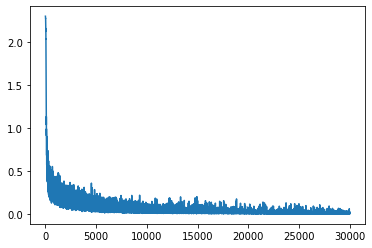

In [30]:
# 5.17

plt.plot(train_loss_list)
plt.show()

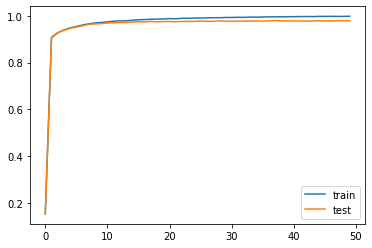

In [31]:
# 5.18

plt.plot(train_acc_list, label='train')
plt.plot(test_acc_list, label='test')
plt.legend()
plt.show()

### ThreeLayerNet
---

In [36]:
# 5.19 ThreeLayerNet

class ThreeLayerNet:

    def __init__(self, i_size, h1_size, h2_size, o_size, init_std = 0.01):

        self.params = {}
        self.params['W1'] = init_std * np.random.randn(i_size, h1_size)
        self.params['b1'] = np.zeros(h1_size)
        self.params['W2'] = init_std * np.random.randn(h1_size, h2_size) 
        self.params['b2'] = np.zeros(h2_size)
        self.params['W3'] = init_std * np.random.randn(h2_size, o_size) 
        self.params['b3'] = np.zeros(o_size)

        self.layers = {}
        self.layers['Affine1'] = Affine(self.params['W1'], self.params['b1'])
        self.layers['Relu1'] = ReLU()
        self.layers['Affine2'] = Affine(self.params['W2'], self.params['b2'])
        self.layers['Relu2'] = ReLU()
        self.layers['Affine3'] = Affine(self.params['W3'], self.params['b3'])
        self.layers['SoftmaxWithLoss'] = SoftmaxWithLoss()


    def predict(self, x): 
        for key in (''): # #Edit  hint - ('Affine1', 'Relu1', ... )  
            x = self.layers[key].forward(x)
        
        return x
        
    def loss(self, x, t):
        o = self.predict(x)
        return self.layers['SoftmaxWithLoss'].forward(o, t)
    
    def accuracy(self, x, t):
        o = self.predict(x)
        o = np.argmax(o, axis=1)
        if t.ndim != 1 : t = np.argmax(t, axis=1)
        
        accuracy = np.sum(o == t) / float(x.shape[0])
        return accuracy
        
    def gradient(self, x, t):
        
        # forward
        self.loss(x, t)

        # backward
        dout = 1
        for key in ( '' ): # Edit  hint - ('SoftmaxWithLoss', 'Affine3', ... )
            dout = self.layers[key].backward(dout)

        grads = {}
        grads['W1'] = self.layers['Affine1'].dW
        grads['b1'] = self.layers['Affine1'].db
        grads['W2'] = self.layers['Affine2'].dW
        grads['b2'] = self.layers['Affine2'].db
        grads['W3'] = self.layers['Affine3'].dW
        grads['b3'] = self.layers['Affine3'].db
        
        return grads

In [39]:
# 5.20

network = ThreeLayerNet(i_size=784, h1_size=300, h2_size=50, o_size=10)

train_size = x_train.shape[0]
batch_size = 100

learning_rate = 0.1

train_loss_list = []
train_acc_list = []
test_acc_list = []

iter_per_epoch = max(train_size // batch_size, 1)
epoch_num = 50
iters_num = epoch_num * iter_per_epoch

epoch = 0

for i in range(iters_num):
    batch_mask = np.random.choice(train_size, batch_size)
    x_batch = x_train[batch_mask]
    t_batch = t_train[batch_mask]
    
    grad = network.gradient(x_batch, t_batch)
    
    for key in network.params.keys():
        network.params[key] -= learning_rate * grad[key]
    
    loss = network.loss(x_batch, t_batch)
    train_loss_list.append(loss)
    
    if i % iter_per_epoch == 0:
        train_acc = network.accuracy(x_train, t_train)
        test_acc = network.accuracy(x_test, t_test)
        train_acc_list.append(train_acc)
        test_acc_list.append(test_acc)
        
        epoch += 1
        print( 'epoch {} accuracy: train {:.4f}, test {:.4f}'.format(epoch, train_acc, test_acc) )


IndexError: ignored

### Test
---

In [41]:
# 5.21

o_test = network.predict(x_test)

In [42]:
# 5.22

o1_test = np.argmax(o_test, axis=1)
t1_test = np.argmax(t_test, axis=1)

fail_mask = o1_test != t1_test

fail_images = x_test[ fail_mask ]
fail_predicts = o1_test[ fail_mask ]
fail_labels = t1_test[ fail_mask ]


In [ ]:
# 5.23

fig = plt.figure(figsize=(16, 40))

image_num = fail_images.shape[0]
print('Failed images #', image_num)

for i in range(image_num):
    ax = fig.add_subplot( (image_num // 10) + 1, 10, i+1 )
    ax.set_title( '{} (label {})'.format(fail_predicts[i], fail_labels[i]) )
    ax.set_xticks([])
    ax.set_yticks([])
    ax.imshow( fail_images[i].reshape(28, 28), cmap='gray' )
plt.show()


Failed images # 10000
